In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Create a simple directed graph
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 1), (3, 4), (4, 3)])
print("Graph created with edges:", list(G.edges()))
print("Number of nodes:", G.number_of_nodes())

Graph created with edges: [(1, 2), (1, 3), (2, 3), (3, 1), (3, 4), (4, 3)]
Number of nodes: 4


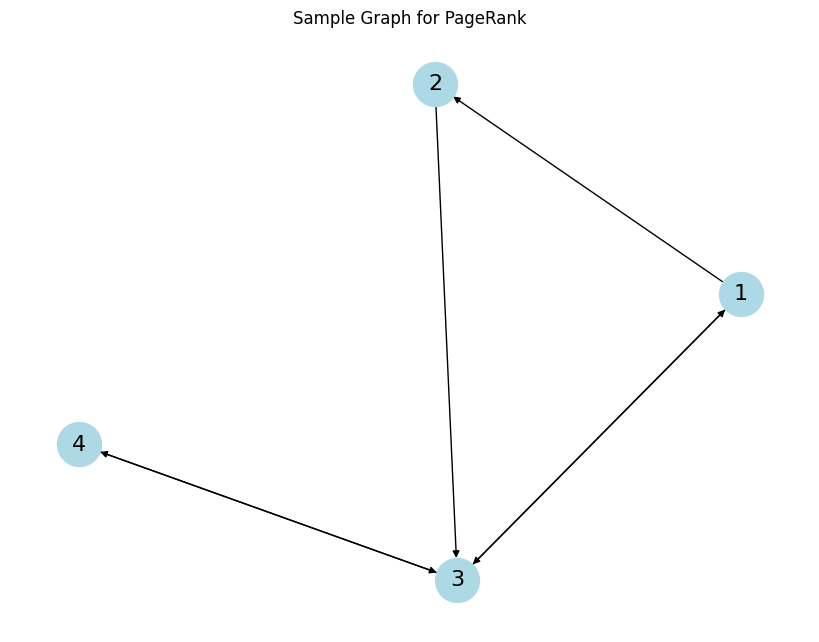

In [ ]:
# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=1000, font_size=16, arrows=True)
plt.title("Sample Graph for PageRank")
plt.show()

In [ ]:
def simple_pagerank(graph, alpha=0.85, max_iter=100, tol=1e-6):
    """Simple PageRank implementation"""
    nodes = list(graph.nodes())
    n = len(nodes)

    # Initialize PageRank values
    pr = {node: 1.0/n for node in nodes}

    for iteration in range(max_iter):
        new_pr = {}

        for node in nodes:
            # Base probability
            new_pr[node] = (1 - alpha) / n

            # Add contributions from incoming links
            for pred in graph.predecessors(node):
                out_degree = graph.out_degree(pred)
                if out_degree > 0:
                    new_pr[node] += alpha * pr[pred] / out_degree

        # Check convergence
        diff = sum(abs(new_pr[node] - pr[node]) for node in nodes)
        pr = new_pr

        if diff < tol:
            print(f"Converged after {iteration + 1} iterations")
            break

    return pr

In [ ]:
# Calculate PageRank using our implementation
pr_custom = simple_pagerank(G)
print("Custom PageRank results:")
for node in sorted(pr_custom.keys()):
    print(f"Node {node}: {pr_custom[node]:.4f}")

Converged after 21 iterations
Custom PageRank results:
Node 1: 0.2199
Node 2: 0.1310
Node 3: 0.4292
Node 4: 0.2199


In [ ]:
# Calculate using NetworkX
pr_nx = nx.pagerank(G, alpha=0.85)
print("\nNetworkX PageRank results:")
for node in sorted(pr_nx.keys()):
    print(f"Node {node}: {pr_nx[node]:.4f}")

print(f"\nDifference between implementations: {sum(abs(pr_custom[n] - pr_nx[n]) for n in G.nodes()):.6f}")


NetworkX PageRank results:
Node 1: 0.2199
Node 2: 0.1310
Node 3: 0.4292
Node 4: 0.2199

Difference between implementations: 0.000001


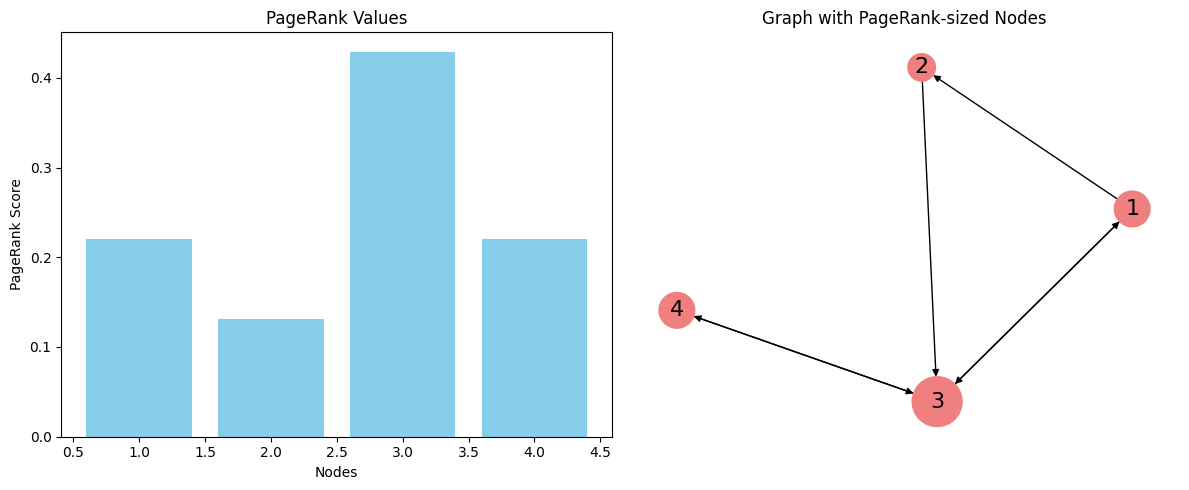

In [ ]:
# Visualize PageRank values
plt.figure(figsize=(12, 5))

# Plot 1: Bar chart
plt.subplot(1, 2, 1)
nodes = list(pr_nx.keys())
values = [pr_nx[n] for n in nodes]
plt.bar(nodes, values, color='skyblue')
plt.title('PageRank Values')
plt.xlabel('Nodes')
plt.ylabel('PageRank Score')

# Plot 2: Graph with node sizes based on PageRank
plt.subplot(1, 2, 2)
node_sizes = [pr_nx[n] * 3000 for n in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=node_sizes,
        node_color='lightcoral', font_size=16, arrows=True)
plt.title('Graph with PageRank-sized Nodes')

plt.tight_layout()
plt.show()

In [ ]:
# Create larger graph (Barabási-Albert model)
G_large = nx.barabasi_albert_graph(10, 3)
G_large = G_large.to_directed()

# Calculate PageRank
pr_large = nx.pagerank(G_large, alpha=0.85)

print("PageRank for larger graph:")
for node in sorted(pr_large.keys()):
    print(f"Node {node}: {pr_large[node]:.4f}")

# Find top 3 nodes
top_nodes = sorted(pr_large.items(), key=lambda x: x[1], reverse=True)[:3]
print(f"\nTop 3 nodes by PageRank: {top_nodes}")

PageRank for larger graph:
Node 0: 0.1646
Node 1: 0.1146
Node 2: 0.0350
Node 3: 0.0747
Node 4: 0.1362
Node 5: 0.1148
Node 6: 0.0942
Node 7: 0.0960
Node 8: 0.0959
Node 9: 0.0742

Top 3 nodes by PageRank: [(0, 0.16456109061039126), (4, 0.1361614728639232), (5, 0.114780166167062)]


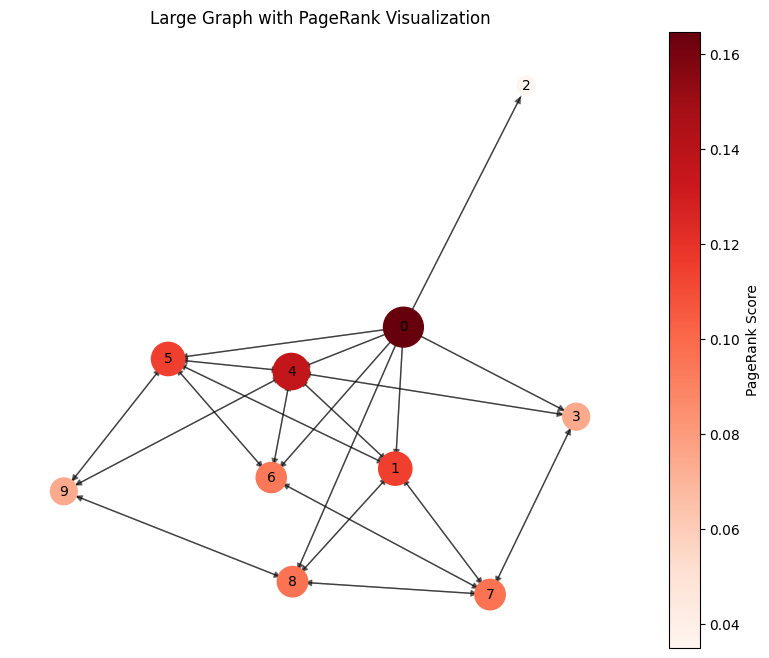

Assignment 10 - PageRank Algorithm Complete!


In [ ]:
# Visualize large graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_large)

# Node sizes and colors based on PageRank
node_sizes = [pr_large[n] * 5000 for n in G_large.nodes()]
node_colors = [pr_large[n] for n in G_large.nodes()]

# Draw the network
nodes = nx.draw_networkx_nodes(G_large, pos, node_size=node_sizes,
                              node_color=node_colors, cmap='Reds')
nx.draw_networkx_labels(G_large, pos, font_size=10)
nx.draw_networkx_edges(G_large, pos, arrows=True, alpha=0.5)

plt.title('Large Graph with PageRank Visualization')
plt.colorbar(nodes, label='PageRank Score')
plt.axis('off')
plt.show()

print("Assignment 10 - PageRank Algorithm Complete!")